[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.  ] [ 5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5
 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17. ] [ 5.   5.5  6.   6.5 -8.   7.5  8.   8.5  9.   9.5 10.  10.5 25.  11.5
 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17. ]


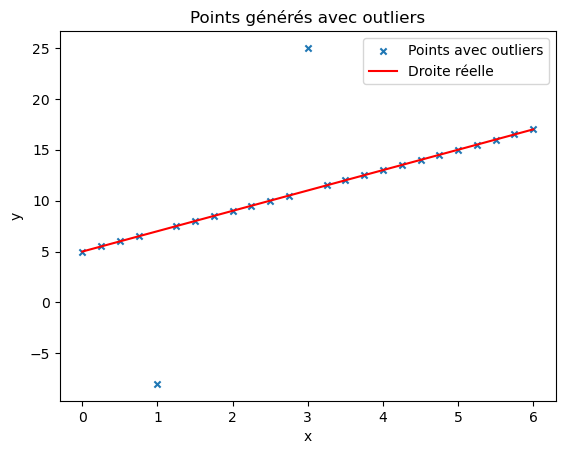

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de la droite y = mx + b
m = 2  # pente
b = 5  # intercept

# Génération des points
np.random.seed(42)  # pour la reproductibilité
x = np.linspace(0, 6, 25)
y_true = m * x + b


y_noisy = y_true.copy()

# Remplacement de 2 points par des outliers
outliers_indices = [4, 12]  # indices des outliers
y_noisy[outliers_indices] = [-8, 25]  # valeurs des outliers
print(x, y_true, y_noisy)
# Tracé des points avec outliers
plt.scatter(x, y_noisy, label="Points avec outliers", marker="x", s=20)
plt.plot(x, y_true, label="Droite réelle", color = 'red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Points générés avec outliers")
plt.show()

In [90]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary
import torch.optim.lr_scheduler as lr_scheduler



# Vérification de la disponibilité de MPS
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

Using device: mps


In [91]:
# Conversion des données en tenseurs PyTorch et envoi sur MPS
x_train_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1).to(device)
y_train_tensor = torch.tensor(y_noisy, dtype=torch.float32).view(-1, 1).to(device)

# Définition du modèle de réseau de neurones
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(1, 50)  # Couche cachée avec 10 000 neurones
        self.hidden_2 = nn.Linear(50, 50)
        self.output = nn.Linear(50, 1)  # Couche de sortie
        
    def forward(self, x):
        x = torch.relu(self.hidden(x))  # Activation ReLU sur la couche cachée
        x = torch.relu(self.hidden_2(x))
        x = torch.relu(self.hidden_2(x))
        x = torch.relu(self.hidden_2(x))


        x = self.output(x)  # Pas d'activation sur la sortie
        return x

# Initialisation du modèle et envoi sur MPS
model = SimpleNN().to(device)
print(model)

# Définition de la fonction de perte et de l'optimiseur
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)



# Entraînement du modèle
num_epochs = 100000

# Fonction de gestion du learning rate
def lr_lambda(epoch):
    total_epochs = num_epochs
    if epoch < total_epochs // 6:
        return 0.1  # 0.1 * 1.0 = 0.1
    elif epoch < 2*total_epochs // 6:
        return 0.05  # 0.1 * 0.5 = 0.05
    elif epoch < 3 * total_epochs // 6:
        return 0.03  # 0.1 * 0.1 = 0.01
    elif epoch < 4 * total_epochs // 6:
        return 0.01  # 0.1 * 0.1 = 0.01
    elif epoch < 5 * total_epochs // 6:
        return 0.005  # 0.1 * 0.1 = 0.01
    else:
        return 0.001  # 0.1 * 0.05 = 0.005

# Initialisation du scheduler
scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda)

for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    y_pred = model(x_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    scheduler.step()  # Mise à jour du learning rate selon l'époque

    if (epoch+1) % 10 == 0:
        lr = optimizer.param_groups[0]["lr"]
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, LR: {lr:.6f}')

# Évaluation du modèle
model.eval()




SimpleNN(
  (hidden): Linear(in_features=1, out_features=50, bias=True)
  (hidden_2): Linear(in_features=50, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=1, bias=True)
)
Epoch [10/100000], Loss: 21.9756, LR: 0.010000
Epoch [20/100000], Loss: 20.9679, LR: 0.010000
Epoch [30/100000], Loss: 19.1520, LR: 0.010000
Epoch [40/100000], Loss: 17.5660, LR: 0.010000
Epoch [50/100000], Loss: 16.3649, LR: 0.010000
Epoch [60/100000], Loss: 16.2714, LR: 0.010000
Epoch [70/100000], Loss: 15.9860, LR: 0.010000
Epoch [80/100000], Loss: 15.6811, LR: 0.010000
Epoch [90/100000], Loss: 15.3680, LR: 0.010000
Epoch [100/100000], Loss: 14.9876, LR: 0.010000
Epoch [110/100000], Loss: 14.5092, LR: 0.010000
Epoch [120/100000], Loss: 13.9472, LR: 0.010000
Epoch [130/100000], Loss: 13.1062, LR: 0.010000
Epoch [140/100000], Loss: 11.4696, LR: 0.010000
Epoch [150/100000], Loss: 9.4611, LR: 0.010000
Epoch [160/100000], Loss: 8.7020, LR: 0.010000
Epoch [170/100000], Loss: 7.9767, LR: 0.01

SimpleNN(
  (hidden): Linear(in_features=1, out_features=50, bias=True)
  (hidden_2): Linear(in_features=50, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=1, bias=True)
)

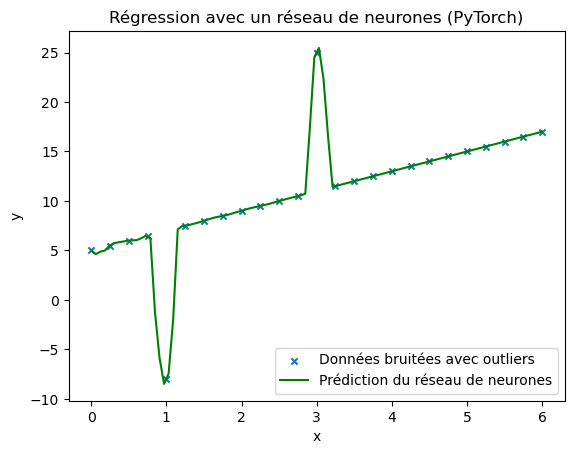

In [92]:
x_ = np.linspace(0, 6, 100)
x_test = torch.tensor(x_, dtype=torch.float32).view(-1, 1).to(device)
with torch.no_grad():
    y_pred_tensor = model(x_test)

# Rapatrier les données sur CPU pour affichage
x_test = x_test.cpu()
y_pred_tensor = y_pred_tensor.cpu()

# Tracé des résultats
plt.scatter(x, y_noisy, label="Données bruitées avec outliers", marker="x", s=20)
plt.plot(x_test.numpy(), y_pred_tensor.numpy(), label="Prédiction du réseau de neurones", color="green")
#plt.plot(x, y_true, label="Droite réelle", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Régression avec un réseau de neurones (PyTorch)")
plt.show()

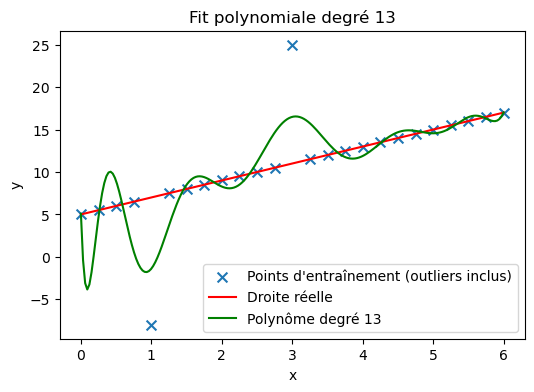

In [93]:
# 2) Ajustement polynomiale de degré 12
degree = 13
coeffs = np.polyfit(x, y_noisy, deg=degree)   # Trouver les coefficients
p = np.poly1d(coeffs)                         # Construire l'objet polynôme

# 3) Évaluation du polynôme sur une grille fine
x_fit = np.linspace(0, 6, 200)
y_fit = p(x_fit)

# 4) Visualisation
plt.figure(figsize=(6, 4))
plt.scatter(x, y_noisy, label="Points d'entraînement (outliers inclus)", marker="x", s=50)
plt.plot(x, y_true, label="Droite réelle", color='red')
plt.plot(x_fit, y_fit, label=f"Polynôme degré {degree}", color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title(f"Fit polynomiale degré {degree}")
plt.show()